# Getting data

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
#0: Iris Setosa
#1: Iris Versicolour
#2: Iris Virginica
df['target'] = iris.target #Adding New Variable 

# Data analysis

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

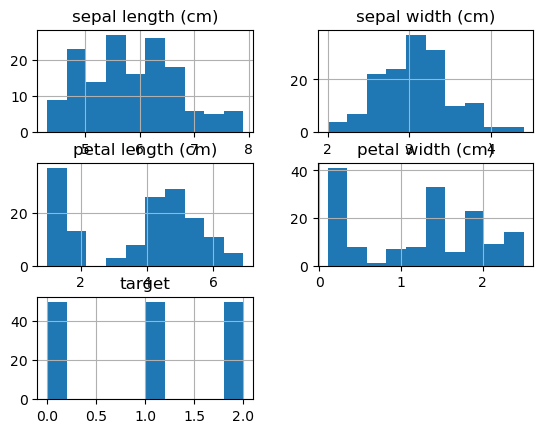

In [13]:
df.hist()

In [14]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

# Modelling Binary Classification

### Preparing data

In [19]:
#0: Iris Setosa
#1: Iris Versicolour
#2: Iris Virginica
binary_data = df[df['target'] != 2]  # Exclude class 2
X_binary = binary_data.drop('target', axis=1)
y_binary = binary_data['target']

In [21]:
from sklearn.model_selection import train_test_split

# Split the data for binary classification
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

### Creating Pipeline

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline for binary classification
binary_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

### Training Model

In [27]:
# Train the pipeline for binary classification
binary_pipeline.fit(X_train_binary, y_train_binary)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(random_state=42))])

### Testing and Evaluating

In [30]:
# Predictions and evaluation for binary classification
y_pred_binary = binary_pipeline.predict(X_test_binary)
print("Binary Classification:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_binary))

Binary Classification:
Accuracy: 1.0
Confusion Matrix:
 [[17  0]
 [ 0 13]]


# Modeling Multi-class Classification Model

### Preparing data

In [34]:
# Multi-class Classification: Use all classes
X_multi = df.drop('target', axis=1)
y_multi = df['target']

In [36]:
# Split the data for multi-class classification
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)

### Creating Pipeline

In [39]:
# Create a pipeline for multi-class classification
multi_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(C=30, random_state=42, max_iter=10000))
])

### Training the model

In [42]:
multi_pipeline.fit(X_train_multi, y_train_multi)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=30, max_iter=10000, random_state=42))])

### Testing and Evaluating

In [45]:
# Predictions and evaluation for multi-class classification
y_pred_multi = multi_pipeline.predict(X_test_multi)
print("\nMulti-class Classification:")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_multi))
print("Confusion Matrix:\n", confusion_matrix(y_test_multi, y_pred_multi))


Multi-class Classification:
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Major Evaluation

<br>**Results of both models are accurate.**
<br>0: Iris Setosa
<br>1: Iris Versicolour
<br>2: Iris Virginica

<br>**Binary Classification Model:**
<br>Accuracy: 1.0
<br>Confusion Matrix:
<br>[17 0]
<br>[0 13]

<br>**Multi-class Classification Model:**
<br>Accuracy: 1.0
<br>Confusion Matrix:
<br>[19  0  0]
<br>[ 0 13  0]
<br>[ 0  0 13]

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

### Binary Classification 

In [55]:
# Predictions for probabilities
y_pred_binary_proba = binary_pipeline.predict_proba(X_test_binary)[:, 1]  # Probability for the positive class

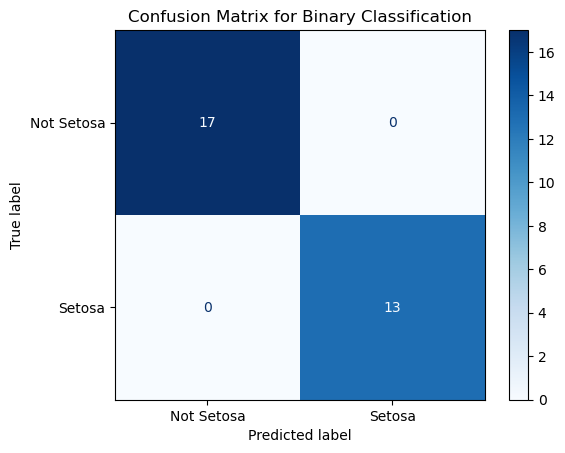

In [57]:
# Confusion Matrix
conf_matrix_binary = confusion_matrix(y_test_binary, y_pred_binary)
disp_binary = ConfusionMatrixDisplay(conf_matrix_binary, display_labels=["Not Setosa", "Setosa"])
disp_binary.plot(cmap="Blues")
plt.title("Confusion Matrix for Binary Classification")
plt.show()

In [59]:
# Accuracy
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy_binary:.4f}")

Accuracy: 1.0000


In [61]:
# Precision, Recall, F1-Score
precision_binary = precision_score(y_test_binary, y_pred_binary)
recall_binary = recall_score(y_test_binary, y_pred_binary)
f1_binary = f1_score(y_test_binary, y_pred_binary)
print(f"Precision: {precision_binary:.4f}")
print(f"Recall: {recall_binary:.4f}")
print(f"F1 Score: {f1_binary:.4f}")

Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [63]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary_proba)
auc_binary = roc_auc_score(y_test_binary, y_pred_binary_proba)

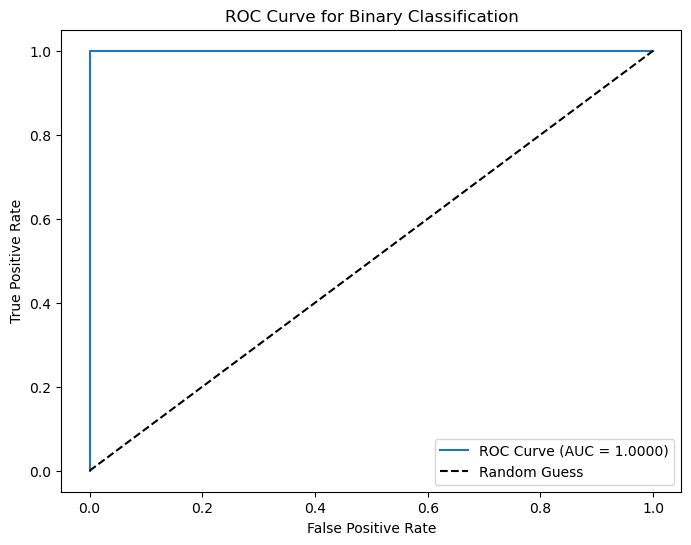

AUC: 1.0000


In [65]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_binary:.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Binary Classification")
plt.legend()
plt.show()

print(f"AUC: {auc_binary:.4f}")

### Multi-class classification

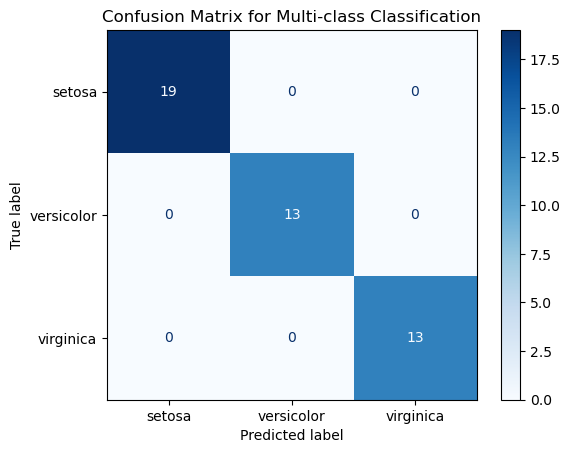

In [68]:
# Confusion Matrix
conf_matrix_multi = confusion_matrix(y_test_multi, y_pred_multi)
disp_multi = ConfusionMatrixDisplay(conf_matrix_multi, display_labels=iris.target_names)
disp_multi.plot(cmap="Blues")
plt.title("Confusion Matrix for Multi-class Classification")
plt.show()

In [70]:
# Accuracy
accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)
print(f"Accuracy: {accuracy_multi:.4f}")

Accuracy: 1.0000


In [72]:
# Classification Report (includes Precision, Recall, F1-Score for each class)
print("Classification Report:\n", classification_report(y_test_multi, y_pred_multi, target_names=iris.target_names))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [74]:
# ROC Curve and AUC for Multi-class
y_pred_multi_proba = multi_pipeline.predict_proba(X_test_multi)

In [78]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)
# One-vs-Rest ROC curves
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(iris.target_names)):  # Loop through each class
    fpr[i], tpr[i], _ = roc_curve((y_test_multi == i).astype(int), y_pred_multi_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

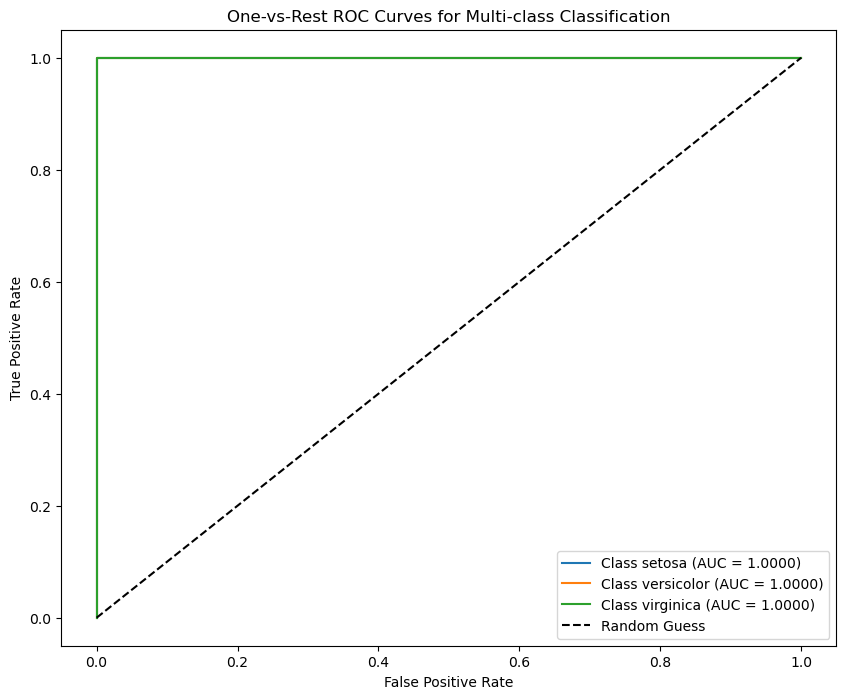

Macro-Average AUC: 1.0000


In [80]:
# Plot ROC Curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(iris.target_names)):
    plt.plot(fpr[i], tpr[i], label=f"Class {iris.target_names[i]} (AUC = {roc_auc[i]:.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curves for Multi-class Classification")
plt.legend()
plt.show()

# Macro-average AUC (average AUC across all classes)
macro_auc = np.mean(list(roc_auc.values()))
print(f"Macro-Average AUC: {macro_auc:.4f}")